In [63]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

sns.set()
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error,r2_score, accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.model_selection import RandomizedSearchCV

In [64]:
df = pd.read_csv('Medicalpremium.csv')
df.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
0,45,0,0,0,0,155,57,0,0,0,25000
1,60,1,0,0,0,180,73,0,0,0,29000
2,36,1,1,0,0,158,59,0,0,1,23000
3,52,1,1,0,1,183,93,0,0,2,28000
4,38,0,0,0,1,166,88,0,0,1,23000


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Age                      986 non-null    int64
 1   Diabetes                 986 non-null    int64
 2   BloodPressureProblems    986 non-null    int64
 3   AnyTransplants           986 non-null    int64
 4   AnyChronicDiseases       986 non-null    int64
 5   Height                   986 non-null    int64
 6   Weight                   986 non-null    int64
 7   KnownAllergies           986 non-null    int64
 8   HistoryOfCancerInFamily  986 non-null    int64
 9   NumberOfMajorSurgeries   986 non-null    int64
 10  PremiumPrice             986 non-null    int64
dtypes: int64(11)
memory usage: 84.9 KB


<AxesSubplot:xlabel='PremiumPrice', ylabel='count'>

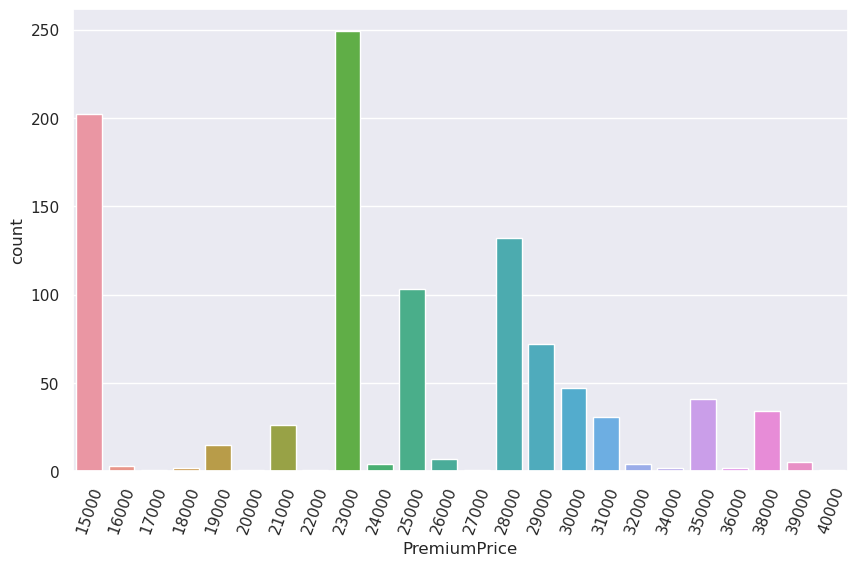

In [66]:
# Premium Price
plt.figure(figsize=(10, 6))
plt.xticks(rotation=70)
sns.countplot(x='PremiumPrice', data=df)

<AxesSubplot:xlabel='Age', ylabel='Count'>

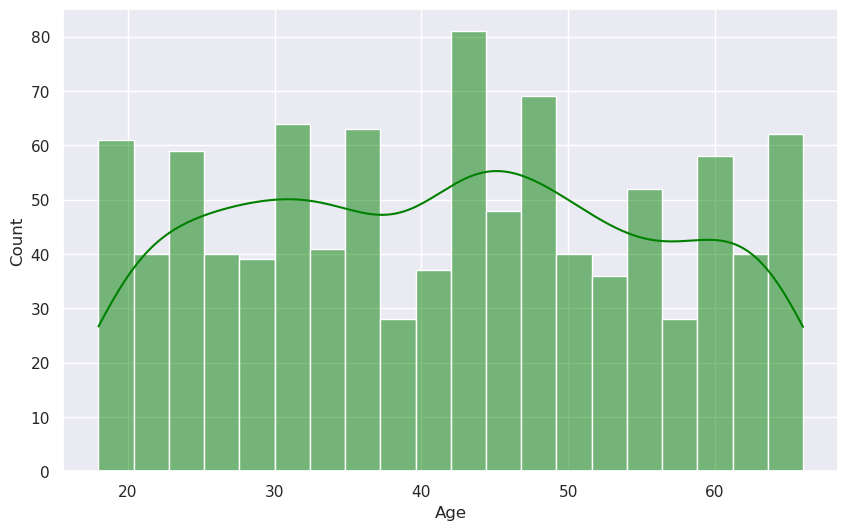

In [67]:
# age
plt.figure(figsize=(10, 6))
sns.histplot(x='Age', data=df, bins=20, kde=True, color='green')

<AxesSubplot:xlabel='Height', ylabel='Count'>

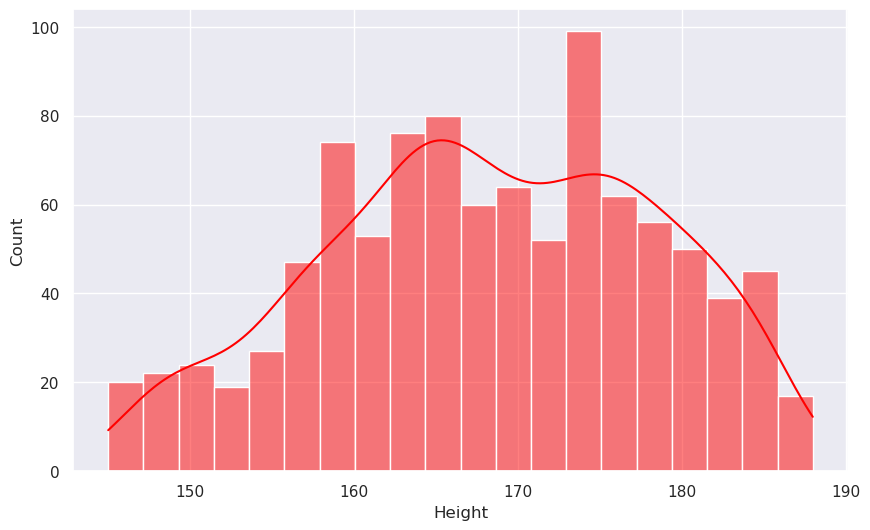

In [68]:
# Height
plt.figure(figsize=(10, 6))
sns.histplot(x='Height', data=df, bins=20, kde=True, color='red')

<AxesSubplot:xlabel='Weight', ylabel='Count'>

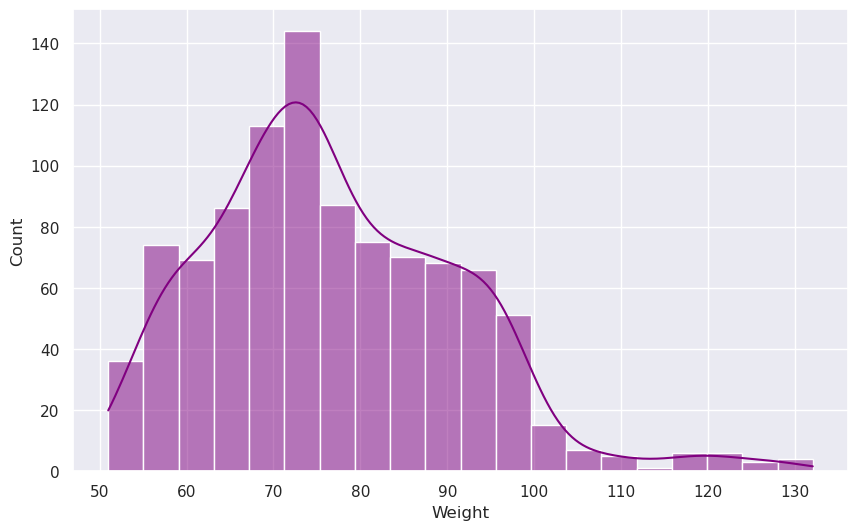

In [69]:
# weight
plt.figure(figsize=(10, 6))
sns.histplot(x='Weight', data=df, bins=20, kde=True, color='purple')

<AxesSubplot:xlabel='HistoryOfCancerInFamily', ylabel='count'>

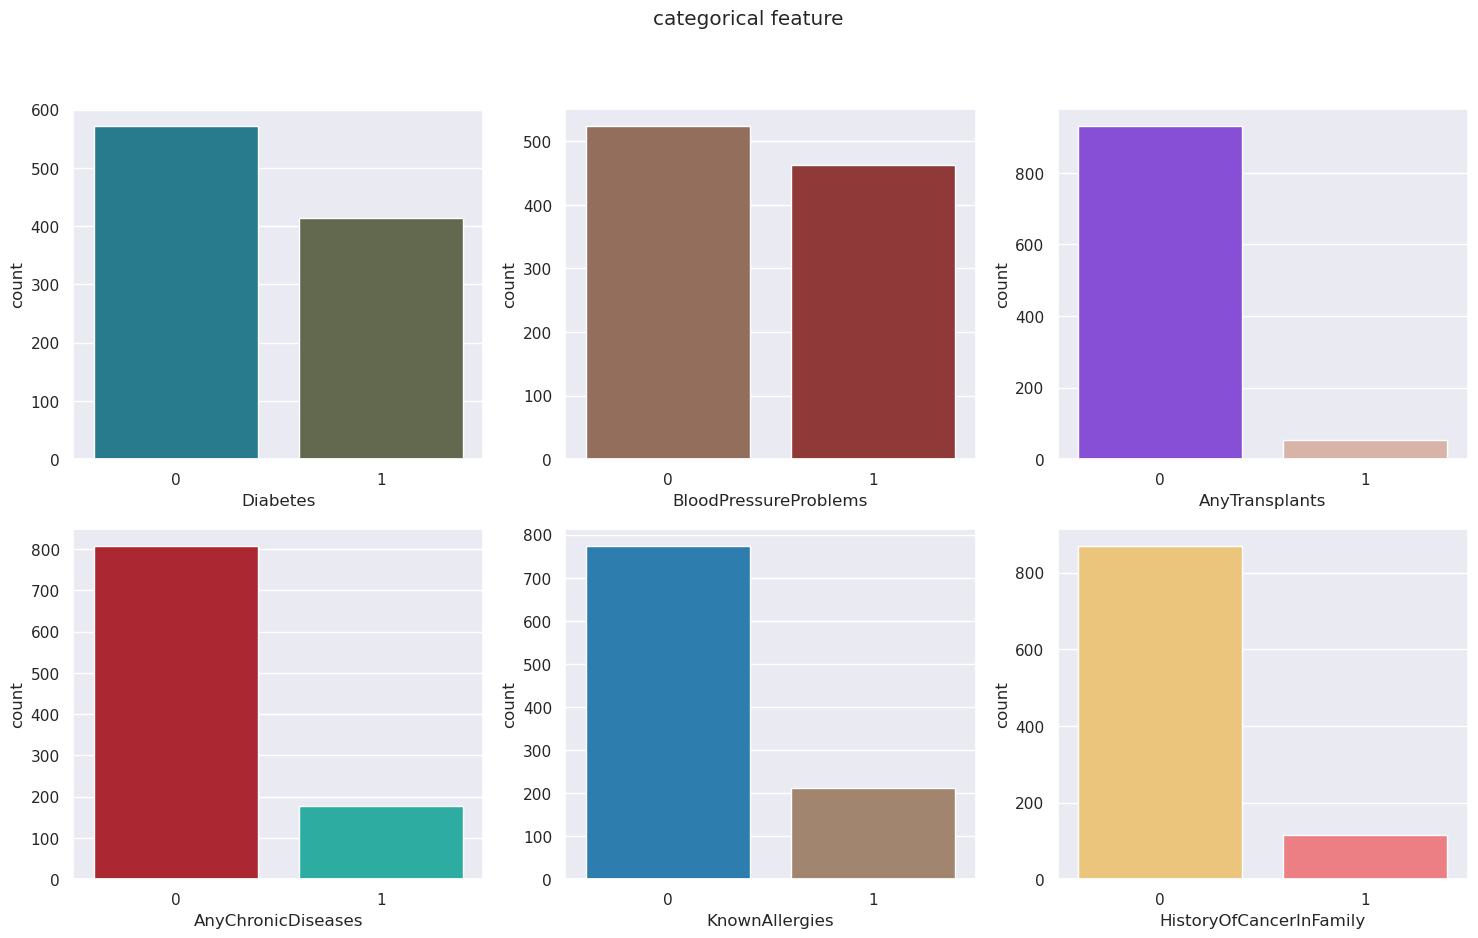

In [70]:
# plot countplot of categorical feature.
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('categorical feature')

sns.countplot(x='Diabetes', data=df, ax=axes[0,0], palette=['#17869E',"#656d4a"])
sns.countplot(x='BloodPressureProblems', data=df, ax=axes[0,1], palette=['#9d6b53',"#9e2a2b"])
sns.countplot(x='AnyTransplants', data=df, ax=axes[0,2], palette=['#8338ec',"#e0afa0"])
sns.countplot(x='AnyChronicDiseases', data=df, ax=axes[1,0], palette=['#c1121f',"#17c3b2"])
sns.countplot(x='KnownAllergies', data=df, ax=axes[1,1], palette=['#1982c4',"#a98467"])
sns.countplot(x='HistoryOfCancerInFamily', data=df, ax=axes[1,2], palette=['#ffcb69',"#fe6d73"])

<AxesSubplot:xlabel='PremiumPrice', ylabel='Weight'>

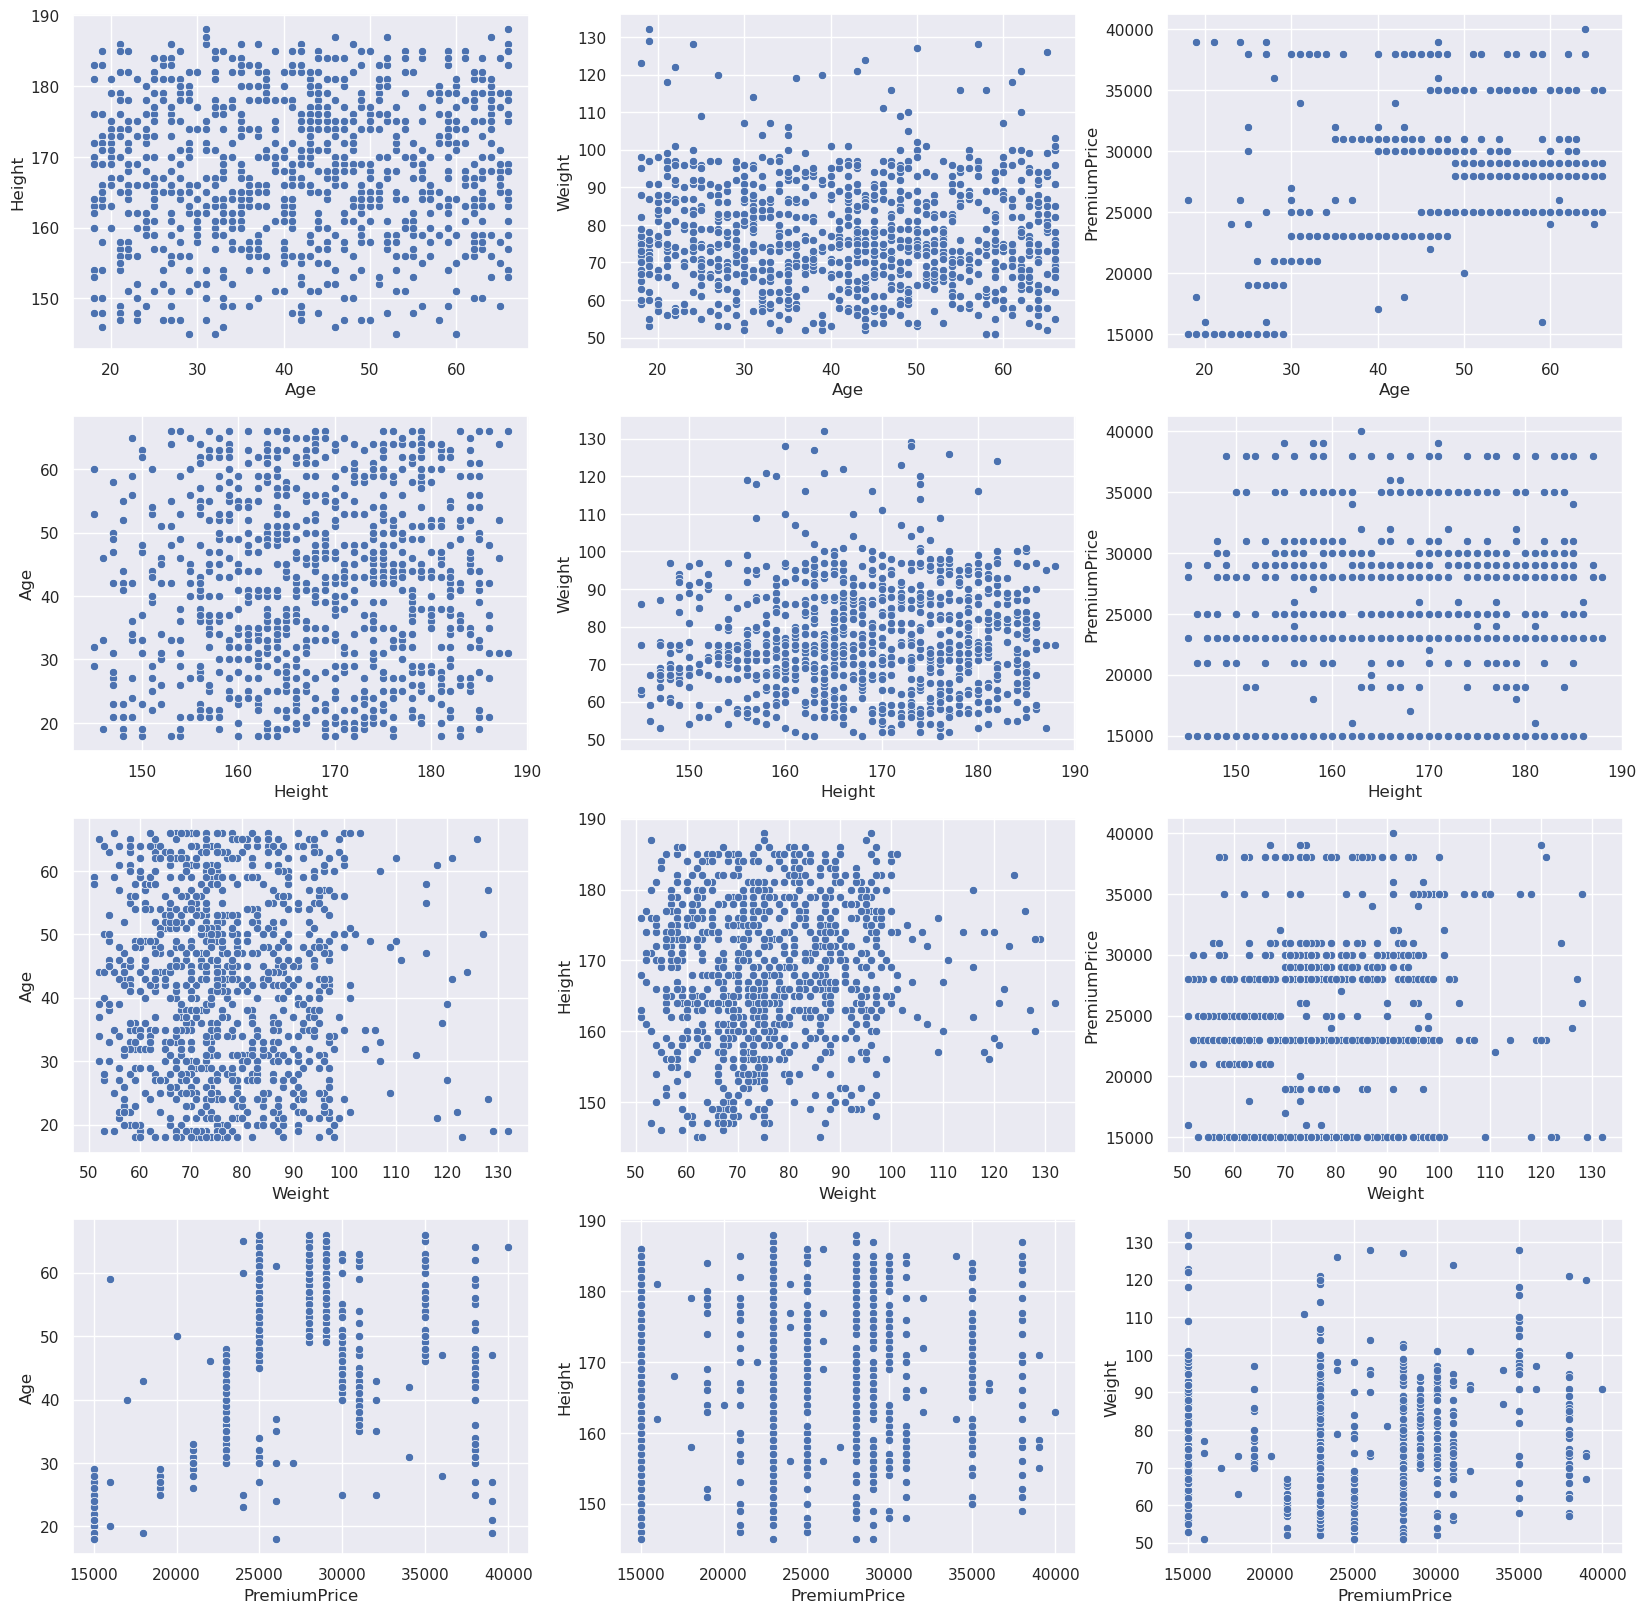

In [71]:
fig, axes = plt.subplots(4, 3, figsize=(20, 20))
sns.scatterplot(x='Age', y='Height', data=df, ax=axes[0, 0])
sns.scatterplot(x='Age', y='Weight', data=df, ax=axes[0, 1])
sns.scatterplot(x='Age', y='PremiumPrice', data=df, ax=axes[0, 2])
sns.scatterplot(x='Height', y='Age', data=df, ax=axes[1, 0])
sns.scatterplot(x='Height', y='Weight', data=df, ax=axes[1, 1])
sns.scatterplot(x='Height', y='PremiumPrice', data=df, ax=axes[1, 2])
sns.scatterplot(x='Weight', y='Age', data=df, ax=axes[2, 0])
sns.scatterplot(x='Weight', y='Height', data=df, ax=axes[2, 1])
sns.scatterplot(x='Weight', y='PremiumPrice', data=df, ax=axes[2, 2])
sns.scatterplot(x='PremiumPrice', y='Age', data=df, ax=axes[3, 0])
sns.scatterplot(x='PremiumPrice', y='Height', data=df, ax=axes[3, 1])
sns.scatterplot(x='PremiumPrice', y='Weight', data=df, ax=axes[3, 2])

In [72]:
X = df.drop(['PremiumPrice'], axis=1)
y = df['PremiumPrice']

<AxesSubplot:>

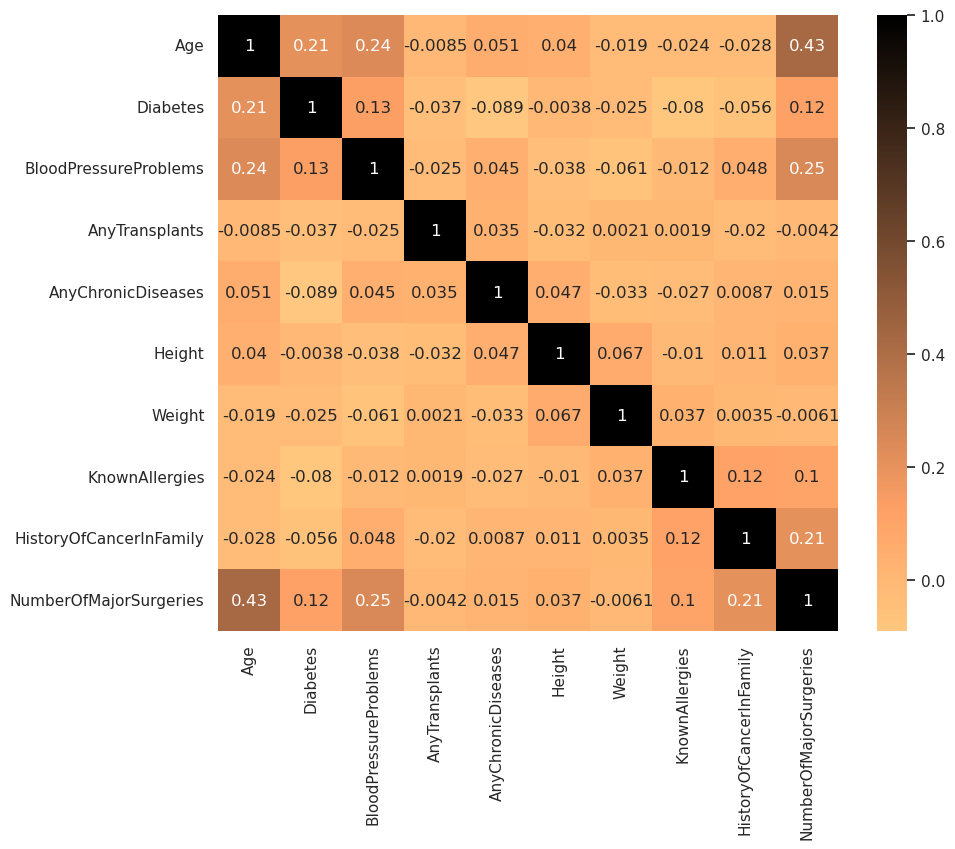

In [73]:
plt.figure(figsize=(10, 8))
sns.heatmap(X.corr(), annot=True, cmap='copper_r')

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [75]:
# Principal Component Analysis
pca = PCA(n_components=10)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

#Best Score was for 10 Components

In [76]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Linear Regression - RMSE: 3584.00, R2 score: 0.71


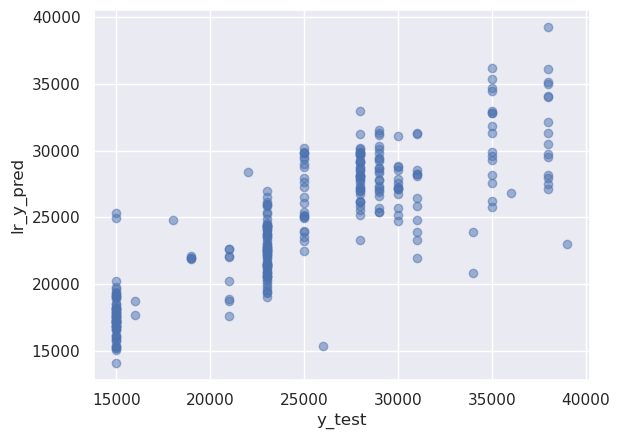

In [77]:
# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_y_pred = lr_model.predict(X_test)
print('Linear Regression - RMSE: %.2f, R2 score: %.2f' % (np.sqrt(mean_squared_error(y_test, lr_y_pred)), r2_score(y_test, lr_y_pred)))
plt.scatter(y_test, lr_y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("lr_y_pred")
plt.show()

In [78]:
#through randomized search cv
rf = RandomForestRegressor()

n_estimators = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]
max_features = ['auto', 'sqrt']
max_depth = [5, 10, 15, 20, 25, 30]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
rf_random = RandomizedSearchCV(estimator = rf, 
                               param_distributions = random_grid,
                               scoring='neg_mean_squared_error', 
                               n_iter = 10, cv = 5, verbose=2, 
                               random_state=42, n_jobs = 1)
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.8s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   2.2s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   2.3s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [79]:
rf_random.best_params_


{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [83]:
best_rf=RandomForestRegressor(n_estimators=700,min_samples_split=15,min_samples_leaf=1,max_features='auto',max_depth=20)
best_rf.fit(X_train,y_train)
rfrandom_y_pred = best_rf.predict(X_test)

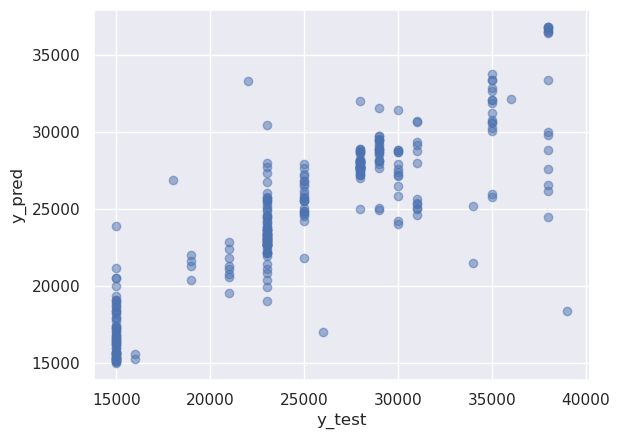

MAE: 2060.704420682461
MSE: 11284436.576918902
RMSE: 3359.2315455947514
R2 Score 0.7426210773491779


In [84]:
plt.scatter(y_test, rfrandom_y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()
print('MAE:', metrics.mean_absolute_error(y_test, rfrandom_y_pred))
print('MSE:', metrics.mean_squared_error(y_test, rfrandom_y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, rfrandom_y_pred)))
print("R2 Score",metrics.r2_score(y_test, rfrandom_y_pred))

Gradient Boosting Regression - RMSE: 3674.54, R2 score: 0.69


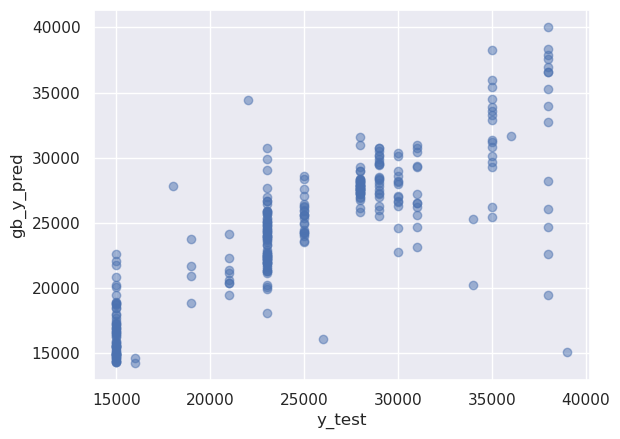

In [85]:
# Hyperparameter tuning for Gradient Boosting Regression
gb_model = GradientBoostingRegressor()
gb_params = {'n_estimators': [100, 200 ],'max_features': ['auto', 'sqrt'], 'learning_rate': [0.01, 0.1, 1.0], 'min_samples_split' : [2, 5, 10], 'max_depth': [5, 10, 15]}
gb_grid = GridSearchCV(gb_model, gb_params, cv=5, scoring='neg_mean_squared_error')
gb_grid.fit(X_train, y_train)
gb_model = gb_grid.best_estimator_
gb_y_pred = gb_model.predict(X_test)
print('Gradient Boosting Regression - RMSE: %.2f, R2 score: %.2f' % (np.sqrt(mean_squared_error(y_test, gb_y_pred)), r2_score(y_test, gb_y_pred)))
plt.scatter(y_test, gb_y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("gb_y_pred")
plt.show()

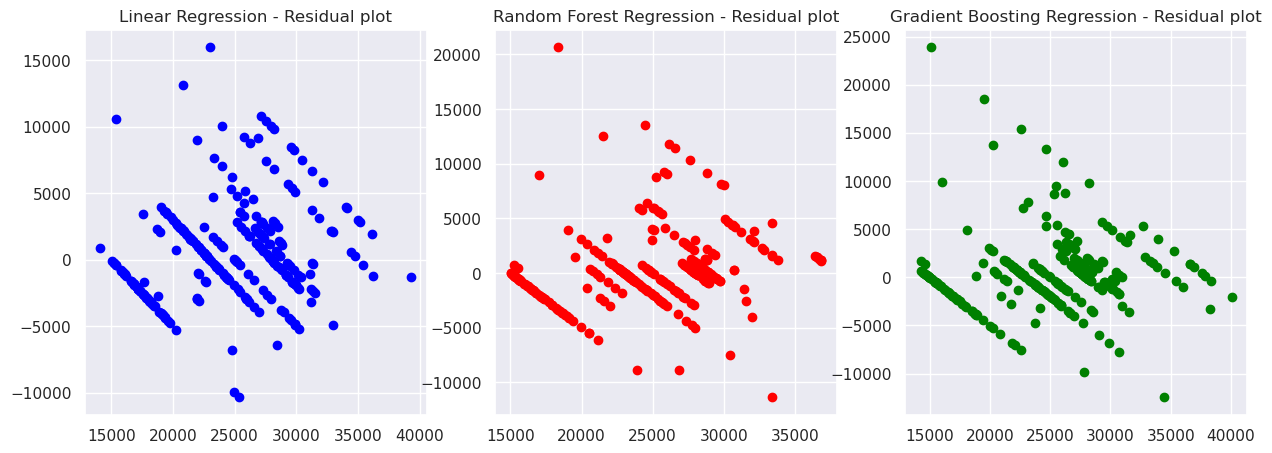

In [86]:
# Residual plot
fig, axes = plt.subplots(1, 3, figsize=(15,5))
axes[0].scatter(lr_y_pred, y_test - lr_y_pred, color='blue')
axes[0].set_title('Linear Regression - Residual plot')
axes[1].scatter(rfrandom_y_pred, y_test - rfrandom_y_pred, color='red')
axes[1].set_title('Random Forest Regression - Residual plot')
axes[2].scatter(gb_y_pred, y_test - gb_y_pred, color='green')
axes[2].set_title('Gradient Boosting Regression - Residual plot')
plt.show()

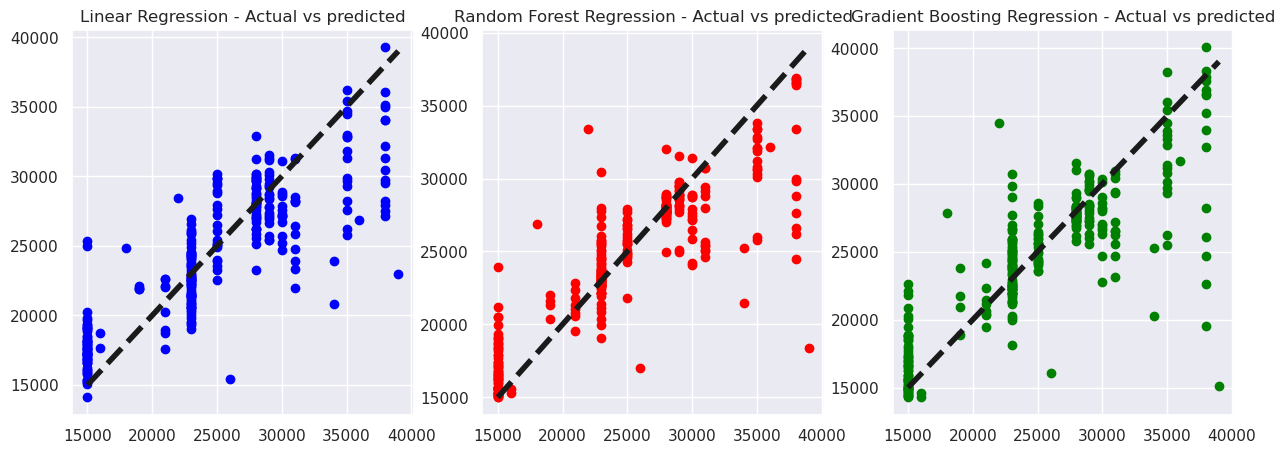

In [87]:
# Actual vs predicted values plot
fig, axes = plt.subplots(1, 3, figsize=(15,5))
axes[0].scatter(y_test, lr_y_pred, color='blue')
axes[0].set_title('Linear Regression - Actual vs predicted')
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
axes[1].scatter(y_test, rfrandom_y_pred, color='red')
axes[1].set_title('Random Forest Regression - Actual vs predicted')
axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
axes[2].scatter(y_test, gb_y_pred, color='green')
axes[2].set_title('Gradient Boosting Regression - Actual vs predicted')
axes[2].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.show()
